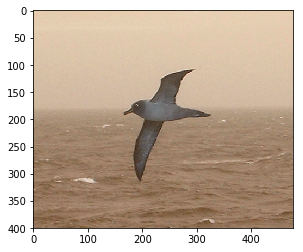

In [87]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("a7.jpg")

# b,g,r = cv2.split(img)  
# img1 = cv2.merge([r,g,b])
plt.imshow(img)


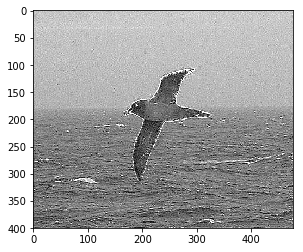

In [88]:
kernel = np.array([[1,1,1],[1,-9,1],[1,1,1]])
kernel2 = -kernel
dst = cv2.filter2D(img,-1,kernel)
dst = dst + (cv2.filter2D(img,-1,kernel2))
# dst = cv2.filter2D(img,-1,kernel)
dst = dst.astype('uint8')
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
plt.imshow(dst, cmap = 'gray')

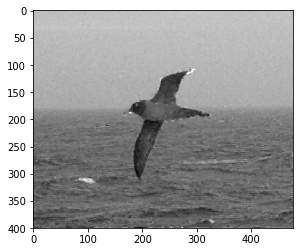

In [89]:

dst = cv2.medianBlur(dst,5)
plt.imshow(dst, cmap = 'gray')

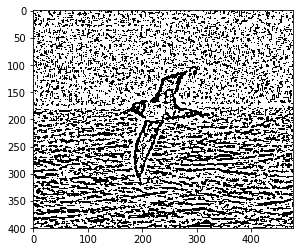

In [90]:
dst = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

plt.imshow(dst, cmap = 'gray')

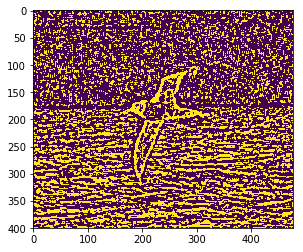

In [91]:
dst = 255-dst
# plt.imshow(dst,cmap="gray")

plt.imshow(dst)

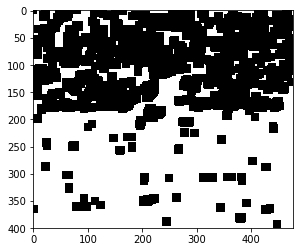

In [92]:
dst = cv2.medianBlur(dst,5)

plt.imshow(dst, cmap = "gray")

kernel = np.ones((10,10), np.uint8) 

img_dilation = cv2.dilate(dst, kernel, iterations=1) 

kernel = np.ones((15,15), np.uint8) 

img_dilation = cv2.erode(img_dilation, kernel, iterations=1) 


plt.imshow(img_dilation, cmap = 'gray')

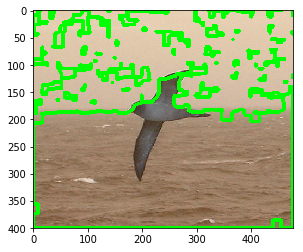

In [93]:
contours, _ = cv2.findContours(img_dilation,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 5)
plt.imshow(img)

In [94]:

rect = []
for i in range(len(contours)):
    if len(contours[i])>100:
        maxx=-1
        maxy=-1
        minx=100000
        miny=100000
        for j in range(len(contours[i])):
            if contours[i][j][0][0] < minx:
                minx = contours[i][j][0][0]
            if contours[i][j][0][0] > maxx:
                maxx = contours[i][j][0][0]
            if contours[i][j][0][1]<miny:
                miny=contours[i][j][0][1]
            if contours[i][j][0][1]>maxy:
                maxy=contours[i][j][0][1]
       
        rect.append([minx,maxx,miny,maxy])
        
#     contours[i] = contours[i].tolist()
#     
#         minx = min(contours[i][0][0])
#         print(minx)
#         maxx= max(contours[i][0].tolist()[0][0])
#         miny = min(contours[i].tolist()[0][1])
#         maxy= max(contours[i].tolist()[0][1])
#     rect.append([[minx,miny],[maxx,maxy]])
                 
rect

[[0, 477, 96, 399]]

In [95]:
for i in range(len(rect)):
    img = cv2.rectangle(img, (rect[i][0],rect[i][2]), (rect[i][1],rect[i][3]), (255, 0, 0),10)

# img = cv2.rectangle(img, (rect[1][0],rect[1][2]), (rect[1][1],rect[1][3]), (255, 0, 0), 2)


(400, 478, 3)

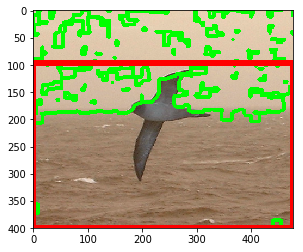

In [96]:
plt.imshow(img)
img.shape

In [97]:
shares = 3
image = img
list_images=[]
for i in range(0,shares):
    list_images.append(img)
(H, W) = image.shape[:2]
list_shares_red=[]
list_shares_green=[]
list_shares_blue=[]
for i in range(0,shares):
    mat1=np.random.randint(256,size=(W,H))
    mat2=np.random.randint(256,size=(W,H))
    mat3=np.random.randint(256,size=(W,H))
    list_shares_red.append(mat1)
    list_shares_green.append(mat2)
    list_shares_blue.append(mat3)
for i in range(len(rect)):
    encrypted_image=[]
    q=0
    w = rect[i][1]-rect[i][0]
    h = rect[i][3]-rect[i][2]

    x = rect[i][0]
    y = rect[i][2]
#             print(w,h,x,y)
    for l in range(0,shares):
        for k in range(0,w):
            for j in range(0,h):
                image[y+j,x+k][0]=(int(image[y+j,x+k][0])-list_shares_red[l][x+k,y+j])%256
                list_images[l][y+j,x+k][0]=list_shares_red[l][x+k,y+j]
                image[y+j,x+k][1]=(int(image[y+j,x+k][1])-list_shares_green[l][x+k,y+j])%256
                list_images[l][y+j,x+k][1]=list_shares_green[l][x+k,y+j]
                image[y+j,x+k][2]=(int(image[y+j,x+k][2])-list_shares_blue[l][x+k,y+j])%256
                list_images[l][y+j,x+k][2]=list_shares_blue[l][x+k,y+j]	

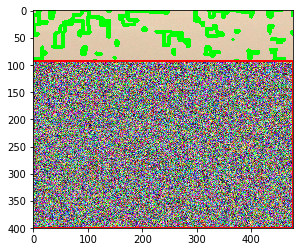

In [98]:
plt.imshow(list_images[0])